In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import layers

In [2]:
data_train_path=r"C:\Users\bhara\Internship_1\Image_classification\Train"
data_test_path=r"C:\Users\bhara\Internship_1\Image_classification\Test"
data_validation_path=r"C:\Users\bhara\Internship_1\Image_classification\Validation"

In [3]:
img_width=180
img_height=180

In [4]:
data_train=tf.keras.utils.image_dataset_from_directory(data_train_path,shuffle=True,image_size=(img_width,img_height),batch_size=32,validation_split=False)

Found 529 files belonging to 2 classes.


In [5]:
data_cat=data_train.class_names
data_cat

['Cat', 'Dog']

In [6]:
data_validation=tf.keras.utils.image_dataset_from_directory(data_validation_path,shuffle=False,image_size=(img_width,img_height),batch_size=32,validation_split=False)

Found 214 files belonging to 2 classes.


In [7]:
data_test=tf.keras.utils.image_dataset_from_directory(data_test_path,shuffle=False,image_size=(img_width,img_height),batch_size=32,validation_split=False)

Found 348 files belonging to 2 classes.


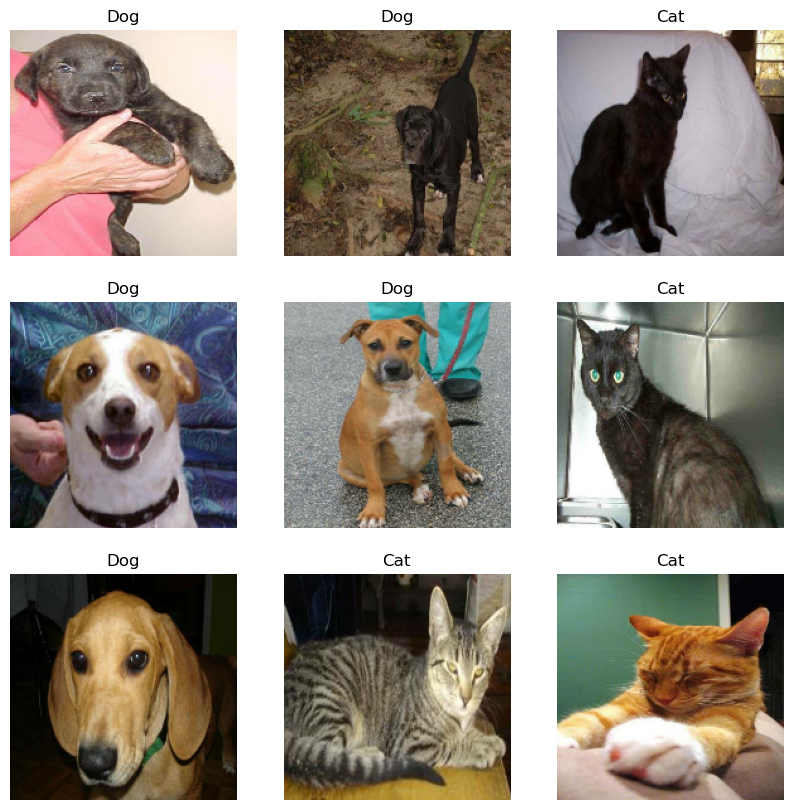

In [8]:
plt.figure(figsize=(10,10))
for image,label in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[label[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [13]:
epoch_data=35
history=model.fit(data_train,validation_data=data_validation,epochs=epoch_data,batch_size=32,verbose=1)

Epoch 1/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 587ms/step - accuracy: 0.4987 - loss: 1.4006 - val_accuracy: 0.6776 - val_loss: 0.6703
Epoch 2/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 447ms/step - accuracy: 0.6546 - loss: 0.6502 - val_accuracy: 0.6589 - val_loss: 0.6421
Epoch 3/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 459ms/step - accuracy: 0.7684 - loss: 0.5404 - val_accuracy: 0.6262 - val_loss: 0.6813
Epoch 4/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 442ms/step - accuracy: 0.7753 - loss: 0.4768 - val_accuracy: 0.5888 - val_loss: 0.7368
Epoch 5/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 422ms/step - accuracy: 0.8188 - loss: 0.3652 - val_accuracy: 0.7430 - val_loss: 0.5982
Epoch 6/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 417ms/step - accuracy: 0.8852 - loss: 0.2579 - val_accuracy: 0.6822 - val_loss: 0.7525
Epoch 7/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 422ms/step - accuracy: 0.9289 - loss: 0.1740 - val_accuracy: 0.7009 - val_loss: 0.7484
Epoch 8/35
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 459ms/step - accuracy: 0.9889 - loss: 0.0864 - val_accuracy: 

Text(0.5, 1.0, 'Loss')

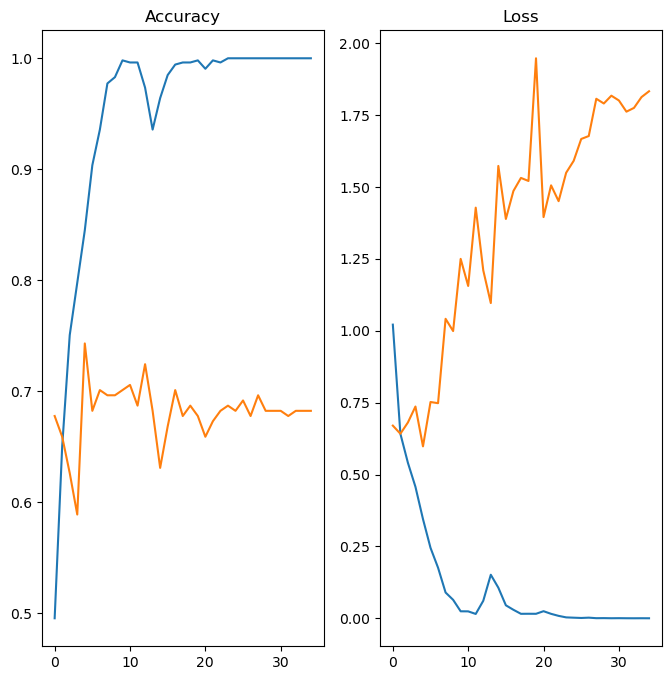

In [14]:
epochs_range=range(epoch_data)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

In [19]:
image='cat.92.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [20]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


In [21]:
score=tf.nn.softmax(predict)
print('cat/dog in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

cat/dog in image is Cat with accuracy of 100.00


In [18]:
model.save('image_classify.keras')